In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
# Load data
lefse = pd.read_csv('lefse_de_output_bar.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse = lefse.sort_values(by='LDAscore', ascending=True)
# Define the condition to filter the data (e.g., Category == 'X')
lefse

,Feature,Pvalues,FDR,PBS-PBS,Lac-PBS,PBS-SCB34,Lac-SCB34,LDAscore
10,Clostridium_sensu_stricto_1,0.011731,0.015996,11356.00,136.650,10327.0,3451.1,3.75
4,Proteus,0.001369,0.003677,1238.60,1145.500,30744.0,32496.0,4.20
0,Haemophilus,0.000469,0.003677,0.00,0.000,22937.0,49028.0,4.39
3,Veillonella,0.001222,0.003677,131.39,46.393,63797.0,0.0,4.50
5,Enterococcus,0.001471,0.003677,44018.00,40977.000,179770.0,283500.0,5.08
6,Staphylococcus,0.001795,0.003845,253230.00,60924.000,22653.0,5462.6,5.09
7,Romboutsia,0.002294,0.003923,289610.00,18005.000,166380.0,12709.0,5.14
2,Streptococcus,0.001033,0.003677,168410.00,115570.000,432670.0,297120.0,5.20
1,Rothia,0.000593,0.003677,160.59,0.000,225350.0,348790.0,5.24
8,Lactobacillus,0.002354,0.003923,3265900.00,3089800.000,5446600.0,4914400.0,6.07


In [3]:
# Specify the columns to consider for finding the max
columns_to_check = ['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']
# Find the column with the maximum value for each row
lefse['Response'] = lefse[columns_to_check].idxmax(axis=1)
lefse


,Feature,Pvalues,FDR,PBS-PBS,Lac-PBS,PBS-SCB34,Lac-SCB34,LDAscore,Response
10,Clostridium_sensu_stricto_1,0.011731,0.015996,11356.00,136.650,10327.0,3451.1,3.75,PBS-PBS
4,Proteus,0.001369,0.003677,1238.60,1145.500,30744.0,32496.0,4.20,Lac-SCB34
0,Haemophilus,0.000469,0.003677,0.00,0.000,22937.0,49028.0,4.39,Lac-SCB34
3,Veillonella,0.001222,0.003677,131.39,46.393,63797.0,0.0,4.50,PBS-SCB34
5,Enterococcus,0.001471,0.003677,44018.00,40977.000,179770.0,283500.0,5.08,Lac-SCB34
6,Staphylococcus,0.001795,0.003845,253230.00,60924.000,22653.0,5462.6,5.09,PBS-PBS
7,Romboutsia,0.002294,0.003923,289610.00,18005.000,166380.0,12709.0,5.14,PBS-PBS
2,Streptococcus,0.001033,0.003677,168410.00,115570.000,432670.0,297120.0,5.20,PBS-SCB34
1,Rothia,0.000593,0.003677,160.59,0.000,225350.0,348790.0,5.24,Lac-SCB34
8,Lactobacillus,0.002354,0.003923,3265900.00,3089800.000,5446600.0,4914400.0,6.07,PBS-SCB34


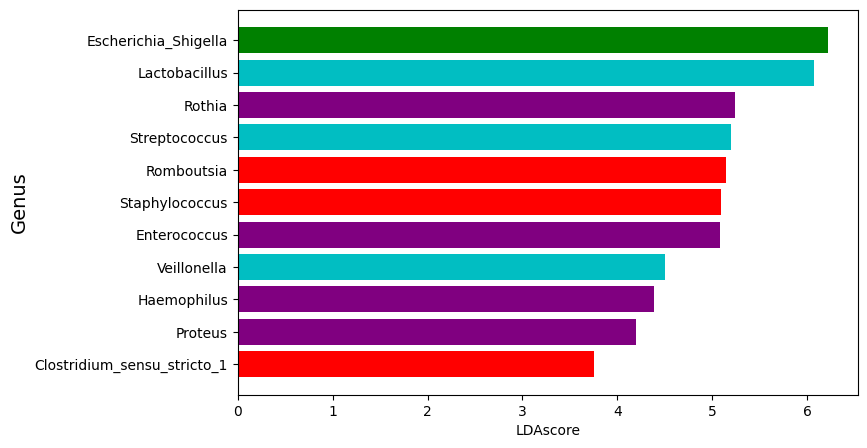

In [7]:
colors = lefse['Response'].map({'PBS-PBS': 'red', 'PBS-SCB34': '#01BEC2','Lac-PBS': 'green','Lac-SCB34': 'purple'})
plt.figure(figsize=(8, 5))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse['Feature'], lefse['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Genus',fontsize = 14)

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='PBS-PBS')
blue_patch = mpatches.Patch(color='#01BEC2', label='PBS-SCB34')
green_patch = mpatches.Patch(color='green', label='Lac-PBS')
orange_patch = mpatches.Patch(color='purple', label='Lac-SCB34')
# plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

plt.show()